# The Spark Foundation #GRIPJUNE 2021

## Task-1 -Prediction using Supervised ML

### Name:Syed Alauddin Bukhari 

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  


In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="tsp-assignment-1")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "syedalauddin-b/tsp-assignment-1" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/syedalauddin-b/tsp-assignment-1


'https://jovian.ai/syedalauddin-b/tsp-assignment-1'

In [5]:
#importing data
data=pd.read_csv("http://bit.ly/w-data")


In [6]:
data  #checking the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Ploting both variable on scatter plot to see relation between them.

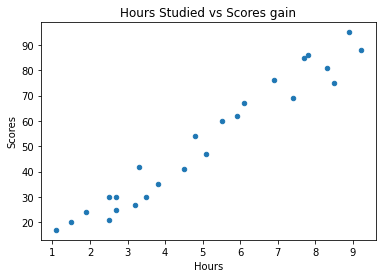

In [7]:
data.plot(x='Hours',y='Scores',kind="scatter")
plt.xlabel("Hours") 
plt.ylabel("Scores") 
plt.title('Hours Studied vs Scores gain') 
plt.show()

From the above we clearly see there is a positive linear relationship between both variables.

## Data Preparation

Next step is to divide Input(independent) and Output(dependent) Variables

In [8]:
X=data.iloc[:, :-1].values  
y =data.iloc[:, 1].values  
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Next we split dataset into training and test set by using train_test_split() method from Scikit-Learn Library


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                      test_size=0.2, random_state=0)

print("Splited")

Splited


In [10]:
#Reshaping 
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [11]:
y_train

array([[35],
       [24],
       [86],
       [76],
       [17],
       [47],
       [85],
       [42],
       [81],
       [88],
       [67],
       [30],
       [25],
       [60],
       [30],
       [75],
       [21],
       [54],
       [95],
       [41]])

## Training The Algorithm

Now let's train our algoritm by using above sets

In [12]:
model=LinearRegression()

In [13]:
model.fit(X_train,y_train)
print("Training Completed")

Training Completed


### Checking parameters of model

In [14]:
print("Coeffeicent\n:",model.coef_)

Coeffeicent
: [[9.91065648]]


In [15]:
print("Intercept:\n",model.intercept_)

Intercept:
 [2.01816004]


### Ploting the regression line

In [16]:
reg_line=model.coef_*X+model.intercept_

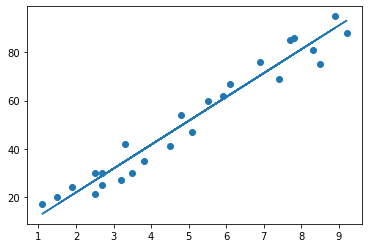

In [17]:
plt.scatter(X,y)
plt.plot(X,reg_line)

## Making Prediction

In [18]:
Y=model.predict(X_test)

In [19]:
#Comparing Both Actual and Predicted output
Compare=pd.DataFrame({'Actual':y_test.reshape(5),'Predict':Y.reshape(5)})
Compare

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
#Making prediction of our data
Hours=[[9.24]]
Pred=model.predict(Hours)
print('Score Prediction:',Pred)

Score Prediction: [[93.59262592]]


## Evaluating the model

In [21]:
from sklearn import metrics

In [26]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test, Y))



Mean Absolute Error 4.183859899002982
